In [1]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'

import seaborn as sns

import sys,os,pdb,copy,pickle
from importlib import reload
# import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp


import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


In [2]:
import database
db = database.db

In [3]:
subdb = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
subdb = subdb.query('ntrials>=20&n_neurons>=50')

In [4]:
import pf_recombine_central as pfrc
import fr_map_one_session as fmos
import switch_detection_one_session as sdos
import get_all_switch_add_metrics as gasam

In [5]:
import preprocess_one_session as prepos

In [6]:
subdb = db.loc[db['sess_name']=='e15_13f1_220117']

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [7]:
%%time
all_fields_recombined_all = {}
pf_params_recombined_all = {}
fr_map_trial_df_all = {}
pval_all = {}
best_n_all = {}
X_pwc_all = {}
X_raw_all = {}
changes_df_all = {}
var_res_all = {}
corr_all = {}
all_sw_d_all = {}
all_sw_with_metrics_d_all = {}
trial_index_to_index_within_df_all = {}

spk_beh_df_all = {}

for ind,row in subdb.iterrows():
    data_dir_full = row['data_dir_full']
    ani = ind[0]
    sess = row['sess_name']
    
    res=dpp.load_spk_beh_df(data_dir_full,load_only=True)
    if res is not None:
        spk_beh_df = res['spk_beh_df']
        spk_beh_df,_ = dpp.add_lin_binned(spk_beh_df,bin_size=2.2,nbins=None)
        spk_beh_df_all[ani,sess] = spk_beh_df
        trial_index_to_index_within_df = dpp.trial_index_to_index_within_trialtype(spk_beh_df)
        trial_index_to_index_within_df_all[ani,sess] = trial_index_to_index_within_df
        

    pf_res_recombine = pfrc.main(data_dir_full,force_reload=False,load_only=True)

    all_fields_recombined=pf_res_recombine['all_fields_recombined']
    all_fields_recombined_all[ani,sess] = all_fields_recombined
    pf_params_recombined = pf_res_recombine['params_recombined']
    pf_params_recombined_all[ani,sess] = pf_params_recombined

    fr_map_all = fmos.main(data_dir_full,force_reload=False,load_only=True)
    fr_map_trial_df = fr_map_all['fr_map_trial_df']
    fr_map_trial_df_all[ani,sess] = fr_map_trial_df



    sw_res = sdos.main(data_dir_full,force_reload=False,load_only=True)
    pval = sw_res['pval']
    pval_all[ani,sess]=pval
    best_n = sw_res['best_n']
    best_n_all[ani,sess] = best_n
    X_pwc = sw_res['X_pwc']
    X_pwc_all[ani,sess] = X_pwc
    X_raw = sw_res['X_raw']
    X_raw_all[ani,sess]=X_raw
    changes_df = sw_res['changes_df']
    changes_df_all[ani,sess] = changes_df
    var_res = sw_res['var_res']
    var_res_all[ani,sess]=var_res
    corr = sw_res['corr']
    corr_all[ani,sess] = corr

    sw_info_res=gasam.main(data_dir_full,force_reload=False,load_only=True)
    if sw_info_res is None:
        sw_info_res=gasam.main(data_dir_full,force_reload=True,load_only=False)
    all_sw_d = sw_info_res['all_sw_d']
    all_sw_d_all[ani,sess] = all_sw_d
    all_sw_with_metrics_d = sw_info_res['all_sw_with_metrics_d']
    all_sw_with_metrics_d_all[ani,sess] = all_sw_with_metrics_d

all_fields_recombined_all = pd.concat(all_fields_recombined_all,axis=0)
pf_params_recombined_all = pd.concat(pf_params_recombined_all,axis=0)
fr_map_trial_df_all = pd.concat(fr_map_trial_df_all,axis=0)
pval_all = pd.concat(pval_all,axis=0)
X_pwc_all = pd.concat(X_pwc_all,axis=0)
X_raw_all = pd.concat(X_raw_all,axis=0)
changes_df_all = pd.concat(changes_df_all,axis=0)
var_res_all = pd.concat(var_res_all,axis=0)
corr_all = pd.concat(corr_all,axis=0)
all_sw_d_all = pd.concat(all_sw_d_all,axis=0)
all_sw_with_metrics_d_all = pd.concat(all_sw_with_metrics_d_all,axis=0)
best_n_all = pd.concat(best_n_all,axis=0)

spk_beh_df_all = pd.concat(spk_beh_df_all,axis=0)


/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/fr_map.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/switch_analysis/all_sw_info.p exists; loading---
CPU times: user 405 ms, sys: 422 ms, total: 827 ms
Wall time: 1.13 s


In [8]:
fn ='frmap_null_afterheadscan.p'
folder='/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data'
fn_full=os.path.join(folder,fn)
fr_map_null_new = pickle.load(open(fn_full,'rb'))
fn='fr_map_null_trialtype_vthresh.p'
fn_full=os.path.join(folder,fn)
fr_map_null_old = pickle.load(open(fn_full,'rb'))
fn='place_field_afterheadscan.p'
fn_full=os.path.join(folder,fn)
pf_res_new_before_recombine = pickle.load(open(fn_full,'rb'))


In [9]:
fn = 'all_switch_info.p'
fn_full = os.path.join(data_dir_full,'py_data','switch_analysis',fn)
old_res = pickle.load(open(fn_full,'rb'))

In [10]:
fn = 'place_field_avg_and_trial_vthresh.p'
fn_full = os.path.join(data_dir_full,'py_data',fn)
old_pf = pickle.load(open(fn_full,'rb'))

In [11]:
old_res['pf_all_field_combined']

start end com peak    fr_peak   fr_mean
         field_index                                        
0    31  0               2  13   7   10    7.06924  5.433991
         1              66  81  73   75   9.166158  6.626543
     32  1              43  48  45   45   5.351963  4.199355
     33  0              79  86  82   82   6.677062   5.30254
     34  0              48  54  50   51   3.398153   3.22187
...                    ...  ..  ..  ...        ...       ...
both 361 0               2  17   9   10   8.306651   5.29541
     363 0              11  30  18   16   4.887873  2.781876
     368 0               3  10   6    7   3.370542  2.879066
     374 0               2  16   9   10  12.799865  6.790906
     376 0               2   9   4    2   3.905575  2.900824

[574 rows x 6 columns]

In [12]:
old_all_sw=old_res['all_sw_info']
old_all_sw.query('switch==1')
old_all_field=old_res['pf_all_field_combined']

In [13]:
import switch_metrics as sm

({1: array([27, 31, 27, 29, 35, 37, 53, 43]),
  -1: array([21, 25, 28, 23, 24, 18, 34, 23])},
 array([39, 46, 83, 62, 86, 87, 92, 79]),
 {1: array([0.69230769, 0.67391304, 0.3253012 , 0.46774194, 0.40697674,
         0.42528736, 0.57608696, 0.5443038 ]),
  -1: array([0.53846154, 0.54347826, 0.3373494 , 0.37096774, 0.27906977,
         0.20689655, 0.36956522, 0.29113924])},
 array([  0. ,   6.8,  20. ,  33.6,  42. ,  50.5,  67. ,  84. , 100. ]),
 <Figure size 1440x432 with 4 Axes>,
 array([<AxesSubplot:title={'center':'1'}, ylabel='num. switch / num. place fields'>,
        <AxesSubplot:title={'center':'-1'}, ylabel='num. switch / num. place fields'>],
       dtype=object))

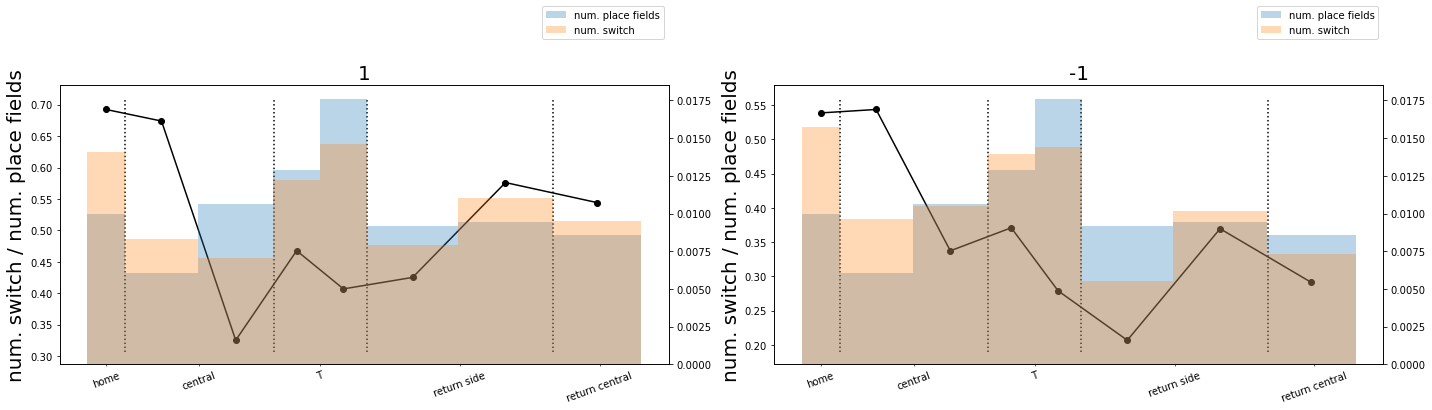

In [14]:
%matplotlib inline
sm.plot_switch_field_ratio(old_all_sw,old_all_field,doplot=True)

({1: array([10, 17, 15, 15, 20, 20, 17, 25]),
  -1: array([ 7,  7,  5, 11, 12,  6,  7, 12])},
 array([ 52,  42,  86,  62,  85,  86,  96, 173]),
 {1: array([0.19230769, 0.4047619 , 0.1744186 , 0.24193548, 0.23529412,
         0.23255814, 0.17708333, 0.14450867]),
  -1: array([0.13461538, 0.16666667, 0.05813953, 0.17741935, 0.14117647,
         0.06976744, 0.07291667, 0.06936416])},
 array([  0. ,   6.8,  20. ,  33.6,  42. ,  50.5,  67. ,  84. , 100. ]),
 <Figure size 1440x432 with 4 Axes>,
 array([<AxesSubplot:title={'center':'1'}, ylabel='num. switch / num. place fields'>,
        <AxesSubplot:title={'center':'-1'}, ylabel='num. switch / num. place fields'>],
       dtype=object))

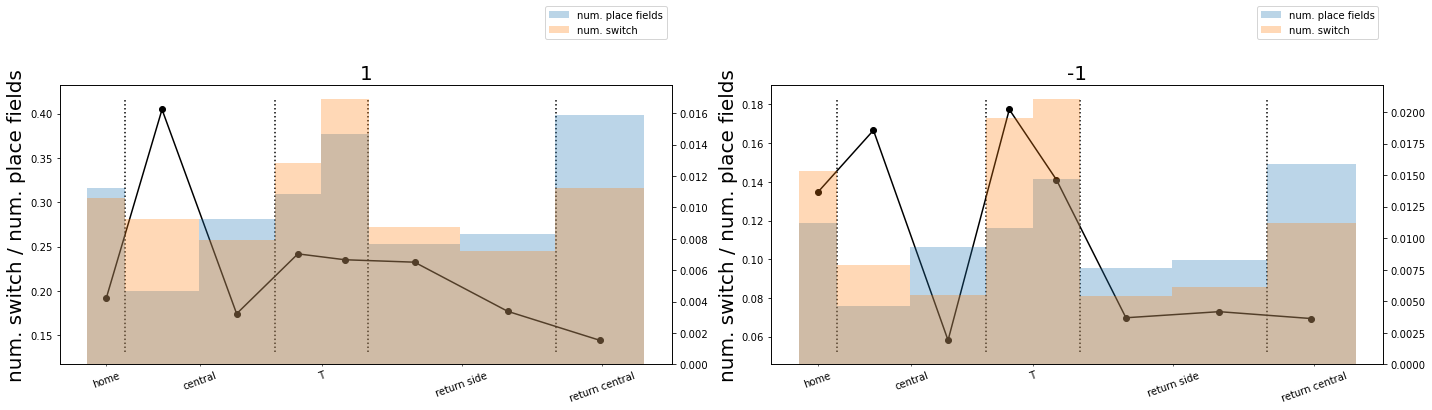

In [15]:
new_all_sw=sw_info_res['all_sw_d'].loc[0]
new_all_field=all_fields_recombined.loc[0]
sm.plot_switch_field_ratio(new_all_sw,new_all_field,doplot=True)

In [16]:
reload(fmos)
fr_map_res_no_filter=fmos.main(data_dir_full,force_reload=True,dosave=False,analysis_kwargs={'speed_key':'speed_gauss','speed_thresh':-1})

fr_map_trial_df_no_filter=fr_map_res_no_filter['fr_map_trial_df'].loc[0]

cant format into a dataframe
cant format into a dataframe


In [17]:
old_all_sw_setind=old_all_sw.set_index(['trialtype','uid','field_index'])
new_all_sw_setind=new_all_sw.set_index(['trialtype','uid','field_index'])
# ind_diff=old_all_sw_setind.index.difference(new_all_sw_setind.index)
ind_diff=old_all_sw_setind.query('field_pos<=8').index.difference(new_all_sw_setind.index)

/tmp/ipykernel_1514560/2039956365.py:16: PerformanceWarning: indexing past lexsort depth may impact performance.
  old_all_sw_setind.loc[ind_one]


time         v  field_pos  trial_index  \
trialtype uid field_index                                                  
0         161 0            6767.689983  0.319029        2.0            4   
              0            7480.520800  0.373688        2.0           17   
              0            8173.079833  0.467564        2.0           29   

                           switch  index_within  switch_trial  \
trialtype uid field_index                                       
0         161 0               1.0             2           2.0   
              0              -1.0             8           8.0   
              0               1.0            17          17.0   

                           switch_trial_frac  pre_mean_fr_1  pre_mean_fr_2  \
trialtype uid field_index                                                    
0         161 0                         0.10       0.000000       0.242556   
              0                         0.40       5.711851       4.249219   
              0                         0.85       0.002050       0.766410   

                           ...  post_ntrial_le_10_perc_frac_total  \
trialtype uid field_index  ...                                      
0         161 0            ...                                0.3   
              0            ...                                0.0   
              0            ...                                0.0   

                           post_ntrial_le_30_perc_frac_total  \
trialtype uid field_index                                      
0         161 0                                         0.50   
              0                                         0.05   
              0                                         0.00   

                           post_ntrial_le_50_perc_frac_total  \
trialtype uid field_index                                      
0         161 0                                          0.7   
              0                                          0.1   
              0                                          0.0   

                           post_ntrial_le_70_perc_frac_total  \
trialtype uid field_index                                      
0         161 0                                         0.75   
              0                                         0.15   
              0                                         0.00   

                           post_ntrial_le_90_perc_frac_total  \
trialtype uid field_index                                      
0         161 0                                         0.75   
              0                                         0.15   
              0                                         0.00   

                           post_ntrial_ge_10_perc_frac_total  \
trialtype uid field_index                                      
0         161 0                                         0.50   
              0                                         0.15   
              0                                         0.00   

                           post_ntrial_ge_30_perc_frac_total  \
trialtype uid field_index                                      
0         161 0                                          0.3   
              0                                          0.1   
              0                                          0.0   

                           post_ntrial_ge_50_perc_frac_total  \
trialtype uid field_index                                      
0         161 0                                         0.10   
              0                                         0.05   
              0                                         0.00   

                           post_ntrial_ge_70_perc_frac_total  \
trialtype uid field_index                                      
0         161 0                                         0.05   
              0                                         0.00   
              0                                         0.00   

                      

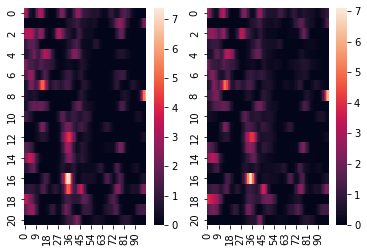

In [96]:
fr_map_trial_df=fr_map_trial_df_all.loc[ani,sess,0]

ind_one = ind_diff[3]
if ind_one[0]=='both':
    tt = 0
else:
    tt = ind_one[0]
fig,axs=plt.subplots(1,2)
ax=axs[0]
sns.heatmap(data=fr_map_trial_df.loc[tt,ind_one[1]].T,ax=ax)


ax=axs[1]
sns.heatmap(data=fr_map_trial_df_no_filter.loc[tt,ind_one[1]].T,ax=ax)
# print(all_fields_recombined.loc[0].loc[ind_one])
old_all_sw_setind.loc[ind_one]

In [97]:
pval.loc[0,ind_one[0]].loc[ind_one[1]]
# pval.loc[0,0].loc[ind_one[1]]

1                                                           \
    pval exp_var_ratio exp_var_ratio_sh_med exp_var_ratio_sh_high   
0  0.530      0.147170             0.151851              0.393358   
1  0.112      0.299915             0.142554              0.467095   

                            2                                     \
  exp_var_ratio_sh_low   pval exp_var_ratio exp_var_ratio_sh_med   
0             0.047688  0.453      0.312850             0.303485   
1             0.051990  0.099      0.673975             0.343498   

                                              ...      4                \
  exp_var_ratio_sh_high exp_var_ratio_sh_low  ...   pval exp_var_ratio   
0              0.577923             0.144788  ...  0.436      0.518279   
1              0.720352             0.192237  ...  0.020      0.814125   

                                                                       5  \
  exp_var_ratio_sh_med exp_var_ratio_sh_high exp_var_ratio_sh_low   pval   
0             0.499037              0.747155             0.256837  0.449   
1             0.493118              0.808751             0.293063  0.023   

                                                            \
  exp_var_ratio exp_var_ratio_sh_med exp_var_ratio_sh_high   
0      0.569374             0.554552              0.790695   
1      0.832372             0.520346              0.831043   

                        
  exp_var_ratio_sh_low  
0             0.295031  
1             0.324622  

[2 rows x 25 columns]

<AxesSubplot:>

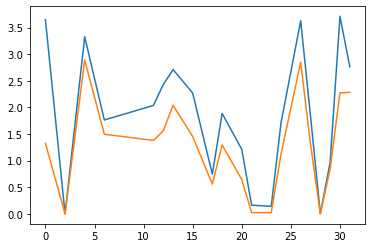

In [98]:
uid = ind_one[1]
# ind_one = ('both',uid,0)
pf_params_recombined.loc['fr_peak'].loc[0].loc[ind_one].dropna().plot()
pf_params_recombined.loc['fr_mean'].loc[0].loc[ind_one].dropna().plot()

In [ ]:
fr_map_all['fr_map'].loc[0,tt].loc[ind_one[1]].plot(marker='o')
fr_map_null_new[0,tt].loc[(slice(None),ind_one[1]),:].quantile(0.99).plot()
fr_map_null_old[0,tt].loc[(slice(None),ind_one[1]),:].quantile(0.99).plot()


In [ ]:
field_params_trial_avgmap_d, all_fields_d, sig_thresh_map_d = pf.field_detection_from_avg(fr_map_d,fr_map_trial_d,fr_map_null)




In [ ]:
spk_beh_df.query('directed_locomotion').groupby('lin_binned')[176].mean().plot()

In [ ]:
pd.DataFrame([spk_beh_df.query('directed_locomotion')['lin_binned'],
spk_beh_df.query('directed_locomotion')[176].shift(4500)]).T.groupby('lin_binned')[176].mean().plot()

In [ ]:
shuffle_res_test=pf.get_fr_map_shuffle_wrapper(data_dir_full,nrepeats=100, dosave=False,force_reload=True,bin_size=2.2,nbins = 100, save_fn='test.p',speed_thresh=0.5,speed_key='directed_locomotion')




In [ ]:
shuffle_res_test[0,0].loc[(slice(None),176),:].quantile(0.99).plot()

In [ ]:
fr_map_null_old

In [ ]:
old_res['all_sw_d']

In [28]:
xx=X_raw.loc[0].loc[ind_one].dropna().values

In [66]:
nrepeats = 1000
xx_sqrt = np.sqrt(xx)
xx_shuffle_sqrt = xx_sqrt.mean() + np.random.normal(size=(nrepeats,xx.shape[0])) *xx_sqrt.std()
xx_shuffle = xx_shuffle_sqrt ** 2
# xx_shuffle = xx.mean() + np.random.normal(size=(nrepeats,xx.shape[0])) * xx.std()

In [72]:
xx_shuffle.std(axis=0)

array([2.01096047, 1.92824083, 2.01010529, 1.9275434 , 1.94903495,
       1.77517238, 2.03183166, 1.93959524, 1.83823638, 1.97977656,
       1.96567994, 2.00914141])

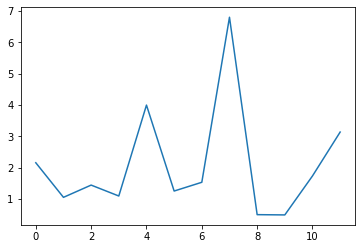

In [81]:
plt.plot(xx_shuffle[7])

In [60]:
xx

array([2.65018749e+00, 1.49877196e+00, 3.53680708e-01, 3.98442239e-01,
       3.52278183e-01, 6.76256374e-01, 3.55320287e-03, 3.20652360e+00,
       4.96106437e+00, 1.31669857e+00, 3.32770071e+00, 6.30454231e+00])

In [84]:
import test_change_point as tcp
reload(tcp)
cp_test_res_one=tcp.test_contiguity(xx,n_shuffle=200,sig_thresh=0.05,n_change_pts=1,min_size=2,signal_shuffle=xx_shuffle)
# cp_test_res_one=tcp.test_contiguity(xx,n_shuffle=1000,sig_thresh=0.05,n_change_pts=1,min_size=2,signal_shuffle=None)

In [85]:
cp_test_res_one

pval                     0.318000
exp_var_ratio            0.570213
exp_var_ratio_sh_med     0.213311
exp_var_ratio_sh_high    0.621939
exp_var_ratio_sh_low     0.065961
dtype: float64